In [6]:
import os
from datetime import datetime

import matplotlib.dates as md
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
from matplotlib import rcParams

In [2]:
cols = ["###MJD", "uJy", "duJy", "duJyu", "duJyl", "duJym", "median", "phase_folded", "F",
        "RA", "Dec", "x", "dx", "y", "dy", "maj", "min", "phi"]


# Functions to convert MJD to matplotlib dates and back for plotting
def mjd2dt(mjd):
    '''MJD to matplotlib datetime'''
    x = Time(mjd, format='mjd')
    x = x.to_value('datetime64', 'date')
    ys = pd.to_datetime(x)
    return [datetime(y.year, y.month, y.day) for y in ys]


def dt2mjd(dt):
    '''Matplotlib datetime to MJD'''
    dt = md.num2date(dt)
    x = Time(dt, format='datetime')
    x = x.to_value('mjd', 'float')
    return x


In [22]:
obj = "g0134456-043013"
data = pd.read_csv(obj+".lc", delim_whitespace=True)
data = data[data['###MJD'] > 57900]

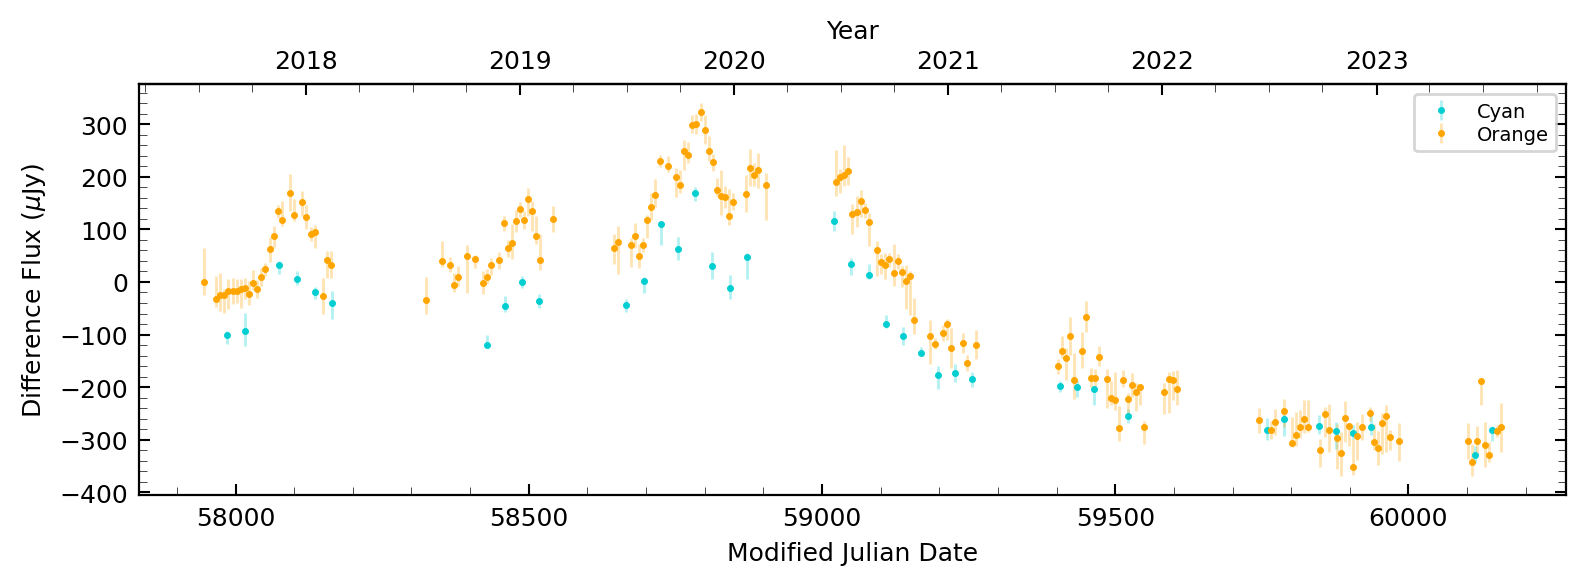

In [23]:
c = data[data['F'] == 'c'].reset_index(drop=True)
o = data[data['F'] == 'o'].reset_index(drop=True)

plt.figure(figsize=(8, 3))
markers, caps, bars = plt.errorbar(c["###MJD"], c["median"], yerr=(c["duJyl"], c["duJyu"]),
                                   color='darkturquoise', fmt='.', ms=3, label='Cyan')
[bar.set_alpha(0.3) for bar in bars]
markers, caps, bars = plt.errorbar(o["###MJD"], o["median"], yerr=(o["duJyl"], o["duJyu"]),
                                   color='orange', fmt='.', ms=3, label='Orange')
[bar.set_alpha(0.3) for bar in bars]

# plt.axvline(x=58417, color='k', alpha=0.25)
# plt.axvline(x=58882, color='k', alpha=0.25)
plt.xlabel("Modified Julian Date")
plt.ylabel(r"Difference Flux ($\mu$Jy)")
# plt.xlim([57900,59700])
plt.legend(loc='best', frameon=True)

axis = plt.gca()
axis.tick_params(axis='x', which='both', top=False)
sec_ax = axis.secondary_xaxis('top', functions=(mjd2dt, dt2mjd))
sec_ax.set_xlabel('Year')
sec_ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))

plt.tight_layout()
plt.savefig("plots/" + obj +".pdf")
plt.show()
